In [213]:
# If you torture your data long enough it can confess to almost anything....
# Explore and torture the data to best possible limits, and data has no limits....
# Get the insights out of it in a best way, first numerically and then visually....

In [214]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

In [215]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [216]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [217]:
titanic_data.Pclass.value_counts()
# there are in total 3 class and most of them belong to the thirs class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [218]:
titanic_data.Sex.value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [219]:
titanic_data.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [220]:
titanic_data.shape

(891, 12)

In [221]:
surv_percentage = 342 / (342+549)
surv_percentage*100

#percentage of survival rate.

38.38383838383838

In [222]:
titanic_data.SibSp.value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [223]:
titanic_data.Parch.value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [224]:
titanic_data.Embarked.value_counts()
#Max people boarded from Southhampton and then... search titanic route on google

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [225]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
titanic_data.isna().sum().sort_values(ascending=False)

#Out of 891, 687 are missing in Cabin -- > Drop

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [227]:
titanic_data.drop("Cabin", axis = 1, inplace=True)

In [228]:
titanic_data.isna().sum().sort_values(ascending=False)


Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [229]:
#First Dexcribe numercial 

In [230]:
titanic_data.describe()

# passengerId is useless
# Survived and Pclass is 0 and 1's hence does not make sense. 
# min age and max age and mean and median is imp
# avg fare is 32, min is 0 and max is 512 $
# 25% of the people have the age around 20 or less than that, similarly 75% has a age of 38 and less
# there is huge gap between 75% of the fare and max fare, why? We need to explore such points...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [231]:
#Describe Categorical Data

titanic_data.select_dtypes(include=['object']).head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [232]:
titanic_data.select_dtypes(exclude=['int', 'float']).head()

#Anothere way to get only categorical values but it's important to get their features by describe function. 

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S


In [233]:
titanic_data.select_dtypes(include=['object']).describe()

#Ticket and Name is no use. 
#Embarked and Sex you can relate it through below function

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Sharp, Mr. Percival James R",male,347082,S
freq,1,577,7,644


In [234]:
titanic_data.Embarked.value_counts()

#Here you can see the top values is S with a frequency value if 644 and in total there are 3 unique class of values 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [235]:
titanic_data.Sex.value_counts()

#Here you can see that the number of males are higher with a freq if 577 and in total unique 2 values i.e Male and Female. 

male      577
female    314
Name: Sex, dtype: int64

In [236]:
titanic_data.isna().sum().sort_values(ascending=False)

#Now Let's deal with Age and Embarked and Pclass

Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [237]:
# Staring with Pclass: Create a new column and convert it into a categorical data. 

In [238]:
titanic_data.Pclass.dtype

dtype('int64')

In [239]:
def create_class(x):
    if x==1:
        return 'Class I'
    elif x==2:
        return 'Class II'
    elif x == 3:
        return 'Class III'
    
titanic_data['Class'] = titanic_data['Pclass'].apply(create_class)    

In [240]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Class III
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Class I
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Class III
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Class I
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Class III


In [241]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Class        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Getting the mode and median of Embarked and Age respectively to impute the missing values, as most of the people has Embarked from SouthHampton ('S')

with fillna function...

#Categorical data:                           #Numerical: 
#Ways to handle missing values:  
1. Mode                                      1. Mean

https://www.mathsisfun.com/data/frequency-grouped-mean-median-mode.html

with fillna function...forward and backward fill method, make sure the boundries are not NA values

Let's see a example below on a different dataframe

In [242]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/student_records.csv")
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


In [243]:
#Imputing some NaN values to sabotage the data
from numpy import nan
df.Obedient.iloc[1] = nan
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,NaN,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


In [244]:
df.Obedient.iloc[6] = nan
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,NaN,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,NaN,60,59,No
7,Trent,C,Y,75,33,No


In [245]:
df.Obedient.fillna(method='ffill') #forward fill Method: Starts from Top to bottom. 

#Here when the loop goes from top to bottom, the NaN values take the values from the top row...

0    Y
1    Y
2    N
3    Y
4    N
5    Y
6    Y
7    Y
Name: Obedient, dtype: object

In [246]:
df.Obedient.fillna(method='bfill') #backward fill Method: Starts from Bottom to Top. 

#Here when the loop goes from bottom to top, the NaN values take the values from the bottom row...

0    Y
1    N
2    N
3    Y
4    N
5    Y
6    Y
7    Y
Name: Obedient, dtype: object

In [247]:
df.Obedient.fillna(method='ffill', inplace = True) #To make the changes are done in the original dataframe

In [248]:
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,Y,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


#### If Mean = Median, substitute by Mean or Median.

#### If Mean != Median, then there are Outliers in the data. Substitute by Median.

In [249]:
#Now let's deal with Embarked and Age:

In [250]:
titanic_data.Embarked.isna().sum()

2

In [251]:
titanic_data.Embarked.mode()[0]

'S'

In [252]:
titanic_data.Embarked.fillna(titanic_data.Embarked.mode()[0], axis=0, inplace =True)

In [253]:
titanic_data.Embarked.isna().sum()

0

In [254]:
# Age

titanic_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

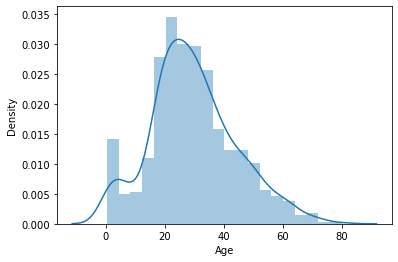

In [255]:
sns.distplot(titanic_data['Age'])

# Here also, mean is quite = to median.

In [256]:
titanic_data.Age.median()

28.0

In [257]:
titanic_data.Age.fillna(titanic_data.Age.median(), axis=0, inplace=True)

In [258]:
titanic_data.Age.isna().sum()

0

In [259]:
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Feature Engineering__

In [260]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Class III
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Class I
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Class III
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Class I
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Class III


In [261]:
# Create a new feature named FamilySize: basically it is adding everyone in the family inclusing the person with passegerid i.e 1. 

titanic_data['FamilySize'] = titanic_data.SibSp + titanic_data.Parch + 1

In [262]:
titanic_data.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Class,FamilySize
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.00,S,Class I,1
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,S,Class I,3
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.50,S,Class II,1


In [263]:
#Segmenting Sex column as per age less than 15 as a Child, greater than 15 as Males and Females as their Gender

titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'], axis=1)

In [264]:
titanic_data.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Class,FamilySize,GenderClass
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,S,Class III,3,male
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,S,Class II,3,female
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,S,Class III,2,male


In [276]:
titanic_data.GenderClass.value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

In [265]:
#Let's now drop unneccessary columns
titanic_data.drop(['PassengerId', 'Name', 'SibSp', 'Parch'], axis = 1, inplace=True)

In [266]:
titanic_data[titanic_data.Age<15].shape

(78, 10)

In [267]:
titanic_data[titanic_data.Age>=15].shape

(813, 10)

In [268]:
#Understanding only Child data
titanic_data[titanic_data.Age<15].head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Class,FamilySize,GenderClass
7,0,3,male,2.0,349909,21.0750,S,Class III,5,child
9,1,2,female,14.0,237736,30.0708,C,Class II,2,child
10,1,3,female,4.0,PP 9549,16.7000,S,Class III,3,child
14,0,3,female,14.0,350406,7.8542,S,Class III,1,child
16,0,3,male,2.0,382652,29.1250,Q,Class III,6,child


In [269]:
# Assigning child data to new dataframe cd for further analysis

cd = titanic_data[titanic_data.Age<15]

In [273]:
cd.groupby('Sex').mean()

,Survived,Pclass,Age,Fare,FamilySize
Sex,,,,,
female,0.615385,2.641026,6.410256,28.332159,3.666667
male,0.538462,2.615385,5.222308,35.076710,4.615385


In [274]:
cd.groupby('Sex')['Survived'].mean()*100

Sex
female    61.538462
male      53.846154
Name: Survived, dtype: float64

In [275]:
cd.groupby('Sex')['Age'].mean()*100

Sex
female    641.025641
male      522.230769
Name: Age, dtype: float64

### Visualisations

In [282]:
titanic_data

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Class,FamilySize,GenderClass
0,0,3,male,22.0,A/5 21171,7.2500,S,Class III,2,male
1,1,1,female,38.0,PC 17599,71.2833,C,Class I,2,female
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,Class III,1,female
3,1,1,female,35.0,113803,53.1000,S,Class I,2,female
4,0,3,male,35.0,373450,8.0500,S,Class III,1,male
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,211536,13.0000,S,Class II,1,male
887,1,1,female,19.0,112053,30.0000,S,Class I,1,female
888,0,3,female,28.0,W./C. 6607,23.4500,S,Class III,4,female
889,1,1,male,26.0,111369,30.0000,C,Class I,1,male


In [283]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked',
       'Class', 'FamilySize', 'GenderClass'],
      dtype='object')

In [ ]:
# Pick the number ones to plot a pairplot for visualising their relationships

#Survived
#Pclass
#Age
#fare


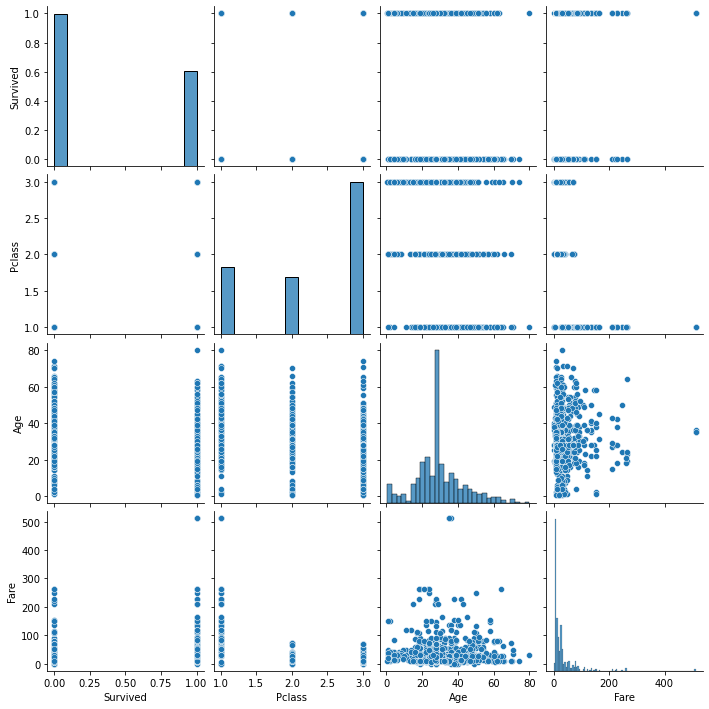

In [284]:
sns.pairplot(titanic_data[['Survived', 'Pclass', 'Age', 'Fare']])

#Not much can be interpretated, hence let's modify this...also include FamilySize

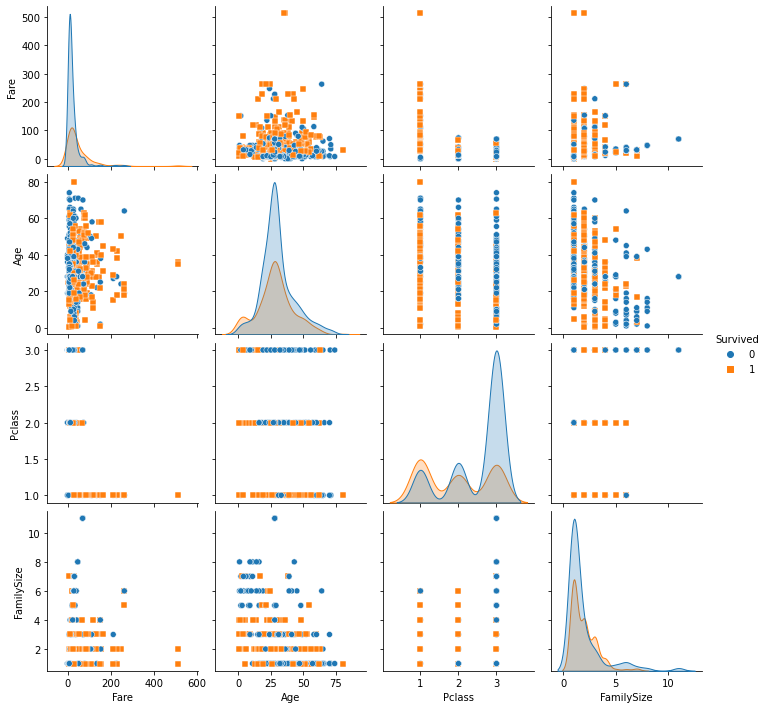

In [300]:
sns.pairplot(titanic_data[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']],
             vars = ['Fare', 'Age', 'Pclass', 'FamilySize'],
             hue = 'Survived',
                 markers=['o', 's'])
plt.show()

Inferences: 

+ Age vs Fare: There were casualties in all age groups starting from children till the age of 80 mostly withing the Fare of less than 200 Dollars. 
+ Pclass: There were more casualties in 3rd class than compare to 1s Class. 
+ Fare vs Family size: Most of the people were travelling with a ticket fare of less than 200 dollars and less than Family size of 6 people. 
+ Family Size vs Age: Most of the family were of a size less than 4 and with a span of 0 to 75 years. 

    

In [303]:
corr = titanic_data.corr()
corr

,Survived,Pclass,Age,Fare,FamilySize
Survived,1.000000,-0.338481,-0.064910,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.339898,-0.549500,0.065997
Age,-0.064910,-0.339898,1.000000,0.096688,-0.245619
Fare,0.257307,-0.549500,0.096688,1.000000,0.217138
FamilySize,0.016639,0.065997,-0.245619,0.217138,1.000000


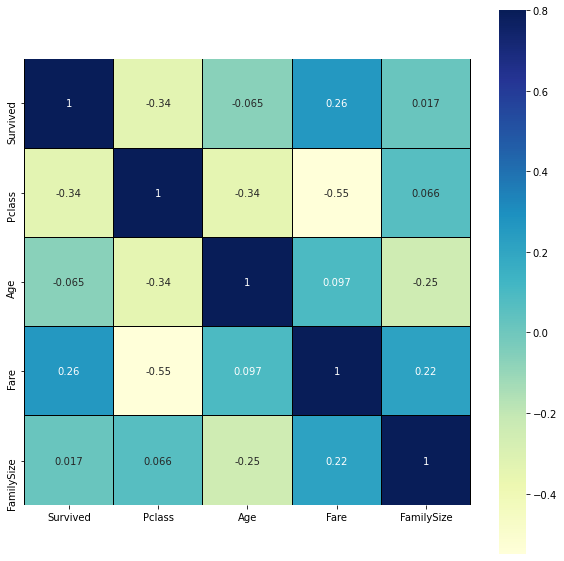

In [304]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=.8, linewidth= 0.01,square=True, annot=True, cmap='YlGnBu', linecolor='black');

Inference:

+ Groups with positive correlation: There are no groups with higher or positve correlation

+ There some moderate correlations:
 - Age vs Fare as all age groups has paid some or the other fare to board the ship. 
 - Pclass vs familysize because all families were distributed among either of the class.
 - Survived vs Fare and Familysize, as the survived members had paid some fare and were belonging to some family group. Where negative correlation with Pclass and age, as most of the people with x age and belonging to some class of the ship did not survive. 

In [290]:
titanic_data.groupby('Sex')['Survived'].mean()*100


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [291]:
titanic_data.groupby('Sex')['Survived'].describe()


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [292]:
titanic_data.groupby('Sex')['Survived'].aggregate(['min',max,np.median, np.mean])


,min,max,median,mean
Sex,,,,
female,0,1,1,0.742038
male,0,1,0,0.188908


In [293]:
titanic_data.groupby(['Sex','Pclass'])['Survived'].mean()


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [294]:
type(titanic_data.groupby(['Sex','Pclass'])['Survived'].mean())


pandas.core.series.Series

In [295]:
titanic_data.groupby(['Sex','Pclass'])['Survived'].mean().unstack()


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [296]:
type(titanic_data.groupby(['Sex','Pclass'])['Survived'].mean().unstack())


pandas.core.frame.DataFrame

In [297]:
# or using pivot table

titanic_data.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447
